|课程名称：数据挖掘|学生姓名：邓力予|学生学号：20201910442|
|-|-|-|
|实验名称：第五章|
|学院：数学与统计学院|专业：数据科学与大数据技术|年级：2020级|

# 导入需要的包

In [13]:
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering
from numpy import log
from matplotlib import pyplot as plt

# 读取数据

In [14]:
data_meta=read_csv("./练习数据Datasets/college.csv")
data_meta=data_meta.rename(columns={"Unnamed: 0":"Name"})

## 只保留私立学校的数据

In [15]:
data_private=data_meta[data_meta["Private"]=="Yes"].drop("Private",axis=1)

# 数据的预处理

## 对数转换

In [16]:
data_private_loged=log(data_private.iloc[:,1:])

## 数据标准化

In [17]:
model_zscore=StandardScaler()
data_private_zscored=model_zscore.fit_transform(data_private_loged)

# 聚类

## K-Means聚类

### 训练模型

In [18]:
model_kmeans=KMeans()
model_kmeans.fit(data_private_zscored)

a:\Program Files\PF\Miniconda3\envs\data-mining\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
a:\Program Files\PF\Miniconda3\envs\data-mining\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans()

### 查看训练结果

In [19]:
print(model_kmeans.labels_)

[1 5 6 0 5 0 0 4 6 5 4 4 6 6 1 2 4 1 1 0 2 0 6 2 6 1 6 1 1 7 0 4 4 7 7 6 1
 2 1 6 2 0 7 6 1 0 5 5 6 1 5 2 3 4 0 7 4 2 5 1 6 7 3 4 4 6 7 2 6 0 6 6 1 7
 6 5 4 3 6 2 6 3 1 7 2 0 1 0 1 5 6 2 4 7 0 0 0 1 1 4 4 2 4 6 0 4 4 6 2 0 0
 0 6 6 0 1 2 2 6 4 4 4 2 6 3 2 1 1 2 4 0 4 3 2 2 1 2 2 3 4 2 4 4 4 1 2 5 1
 1 7 4 6 3 4 5 2 1 2 4 6 6 0 7 5 6 3 6 0 7 5 1 7 2 2 7 2 6 2 1 1 4 7 2 2 2
 3 6 3 2 4 5 7 6 1 4 2 2 2 1 2 4 6 6 6 2 4 6 4 7 6 1 6 6 3 4 1 6 6 6 4 7 0
 0 6 6 1 0 5 2 6 1 6 4 0 1 1 7 7 2 1 7 3 5 4 2 1 4 0 6 1 4 2 7 4 1 4 2 1 4
 6 6 3 6 2 1 4 2 1 1 6 1 6 1 7 7 7 7 6 6 2 4 2 2 1 7 0 2 6 7 7 7 0 0 0 2 6
 2 6 3 2 1 1 7 2 6 7 6 5 1 6 6 1 1 5 0 7 5 6 6 2 5 4 2 2 1 5 6 2 0 6 2 6 6
 2 6 3 1 6 2 6 0 7 1 6 3 7 2 4 4 6 6 4 1 1 6 1 1 7 7 1 6 4 2 7 1 1 2 4 1 2
 6 6 3 7 0 6 7 6 0 4 0 4 4 7 0 2 6 1 2 2 7 0 7 2 6 5 2 6 2 2 7 0 3 6 2 0 6
 4 7 2 6 2 0 7 7 4 1 0 4 6 7 7 6 1 7 5 0 6 1 4 4 1 7 2 5 1 4 2 7 2 6 0 6 4
 2 7 1 6 5 2 2 6 4 7 6 0 3 1 1 6 5 7 1 1 1 2 6 2 4 0 0 4 3 2 7 2 4 2 3 6 7
 7 7 1 1 7 7 1 1 3 1 1 3 

### 绘制散点图

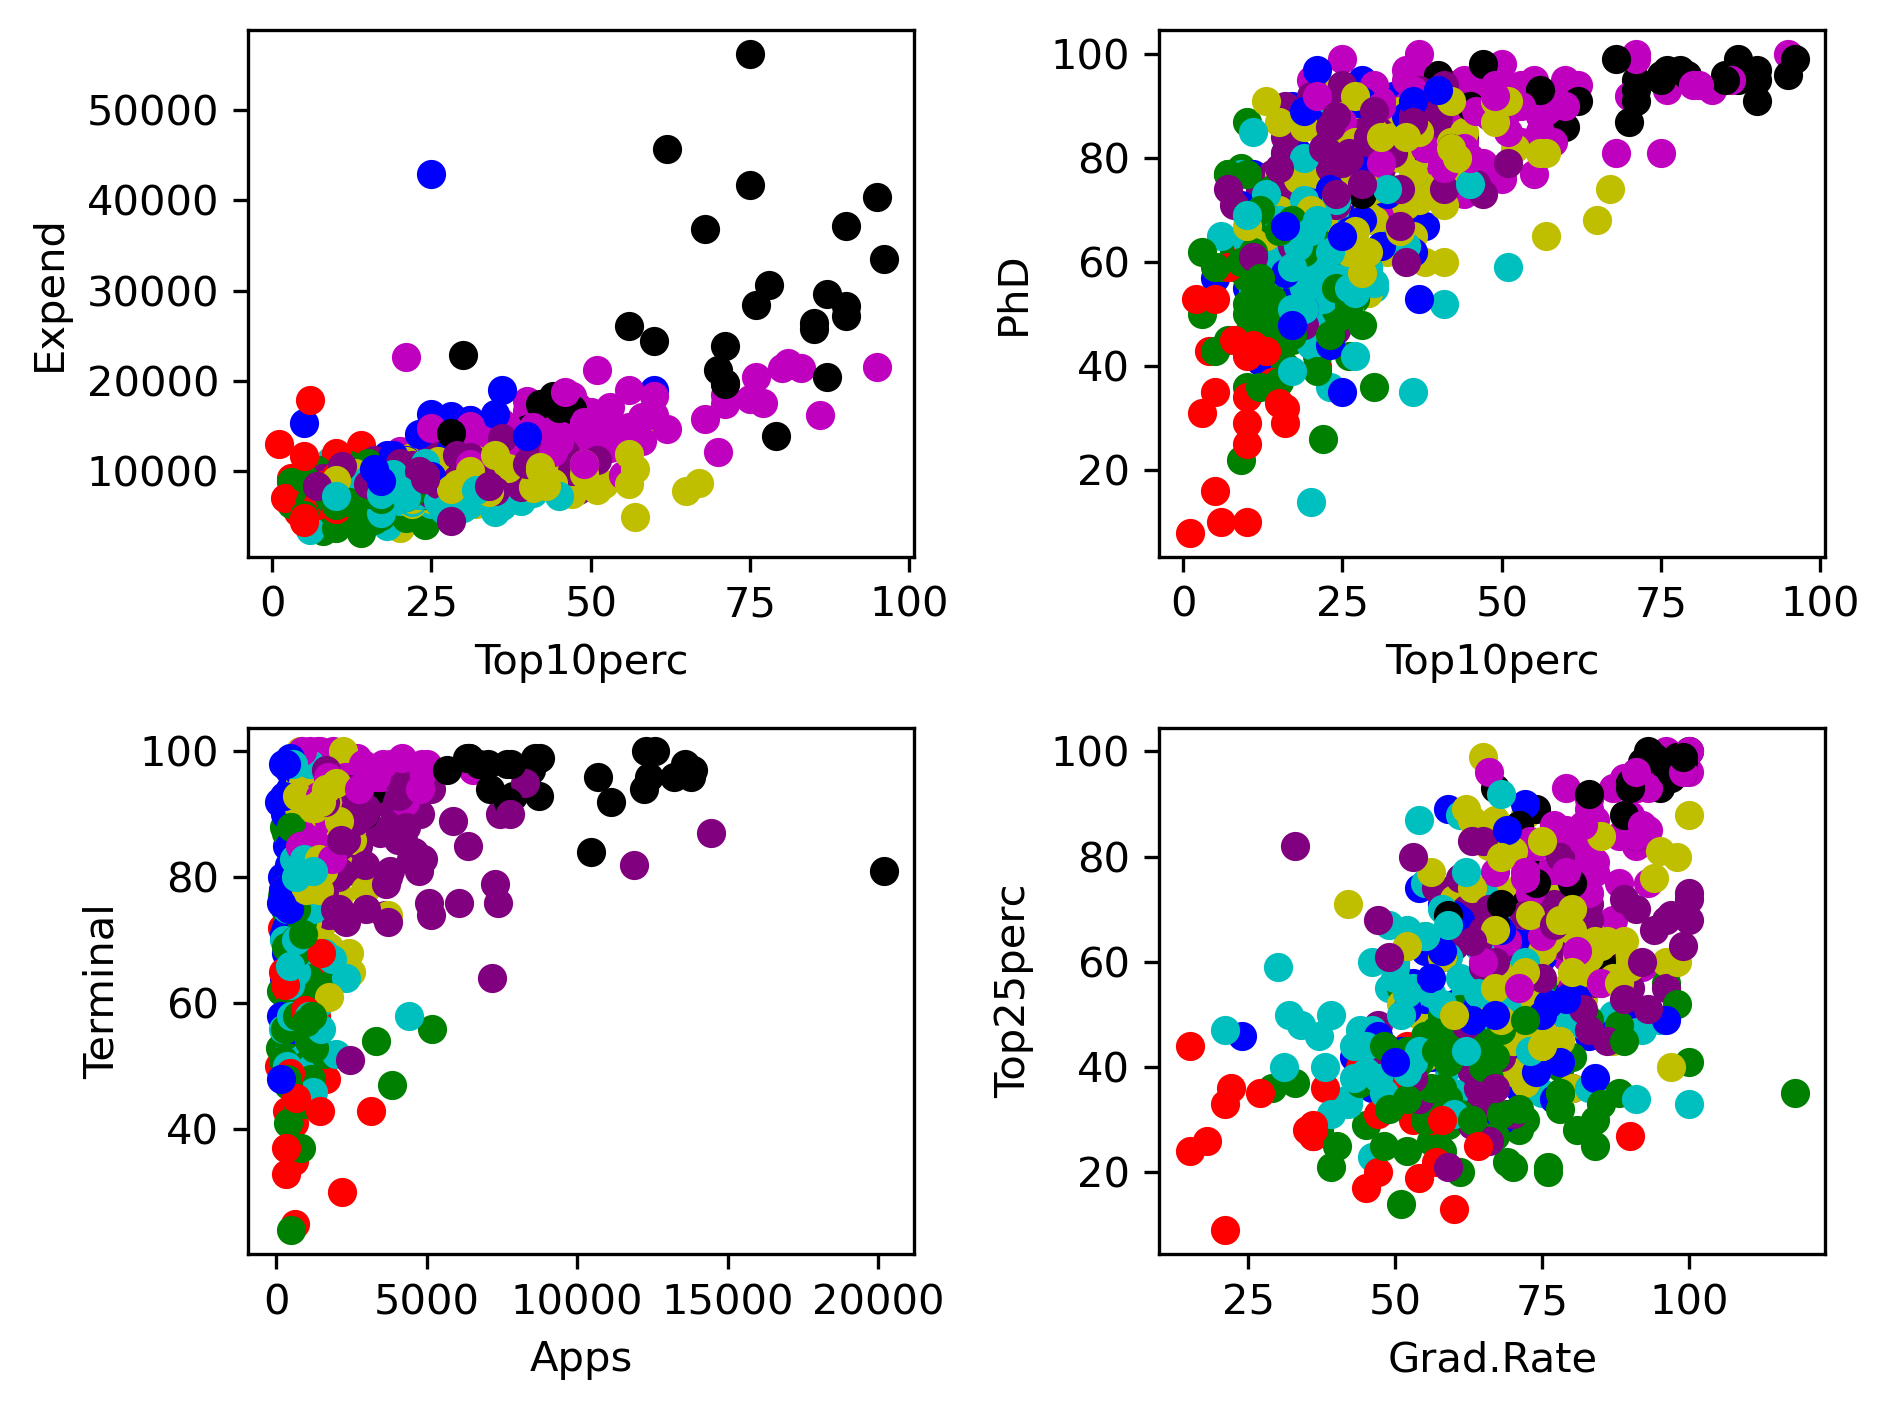

In [20]:
color_list=("b","c","g","k","m","r","y","purple")
fig,ax=plt.subplots(2,2,dpi=300)
j=0
for i in data_private["Top25perc"].index:
    ax[0][0].scatter(data_private["Top10perc"][i],data_private["Expend"][i],color=color_list[model_kmeans.labels_[j]])
    ax[0][1].scatter(data_private["Top10perc"][i],data_private["PhD"][i],color=color_list[model_kmeans.labels_[j]])
    ax[1][0].scatter(data_private["Apps"][i],data_private["Terminal"][i],color=color_list[model_kmeans.labels_[j]])
    ax[1][1].scatter(data_private["Grad.Rate"][i],data_private["Top25perc"][i],color=color_list[model_kmeans.labels_[j]])
    j=j+1

ax[0][0].set_xlabel('Top10perc')
ax[0][0].set_ylabel('Expend')

ax[0][1].set_xlabel('Top10perc')
ax[0][1].set_ylabel('PhD')

ax[1][0].set_xlabel('Apps')
ax[1][0].set_ylabel('Terminal')

ax[1][1].set_xlabel('Grad.Rate')
ax[1][1].set_ylabel('Top25perc')

plt.tight_layout()

## 层次聚类

### 训练模型

In [21]:
model_agglomerative=AgglomerativeClustering()
model_agglomerative.fit(data_private_zscored)

AgglomerativeClustering()

### 聚类结果

In [22]:
print(model_agglomerative.labels_)

[0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0
 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1
 1 1 0 0 1 1 0 0 1 0 0 1 

### 绘制散点图

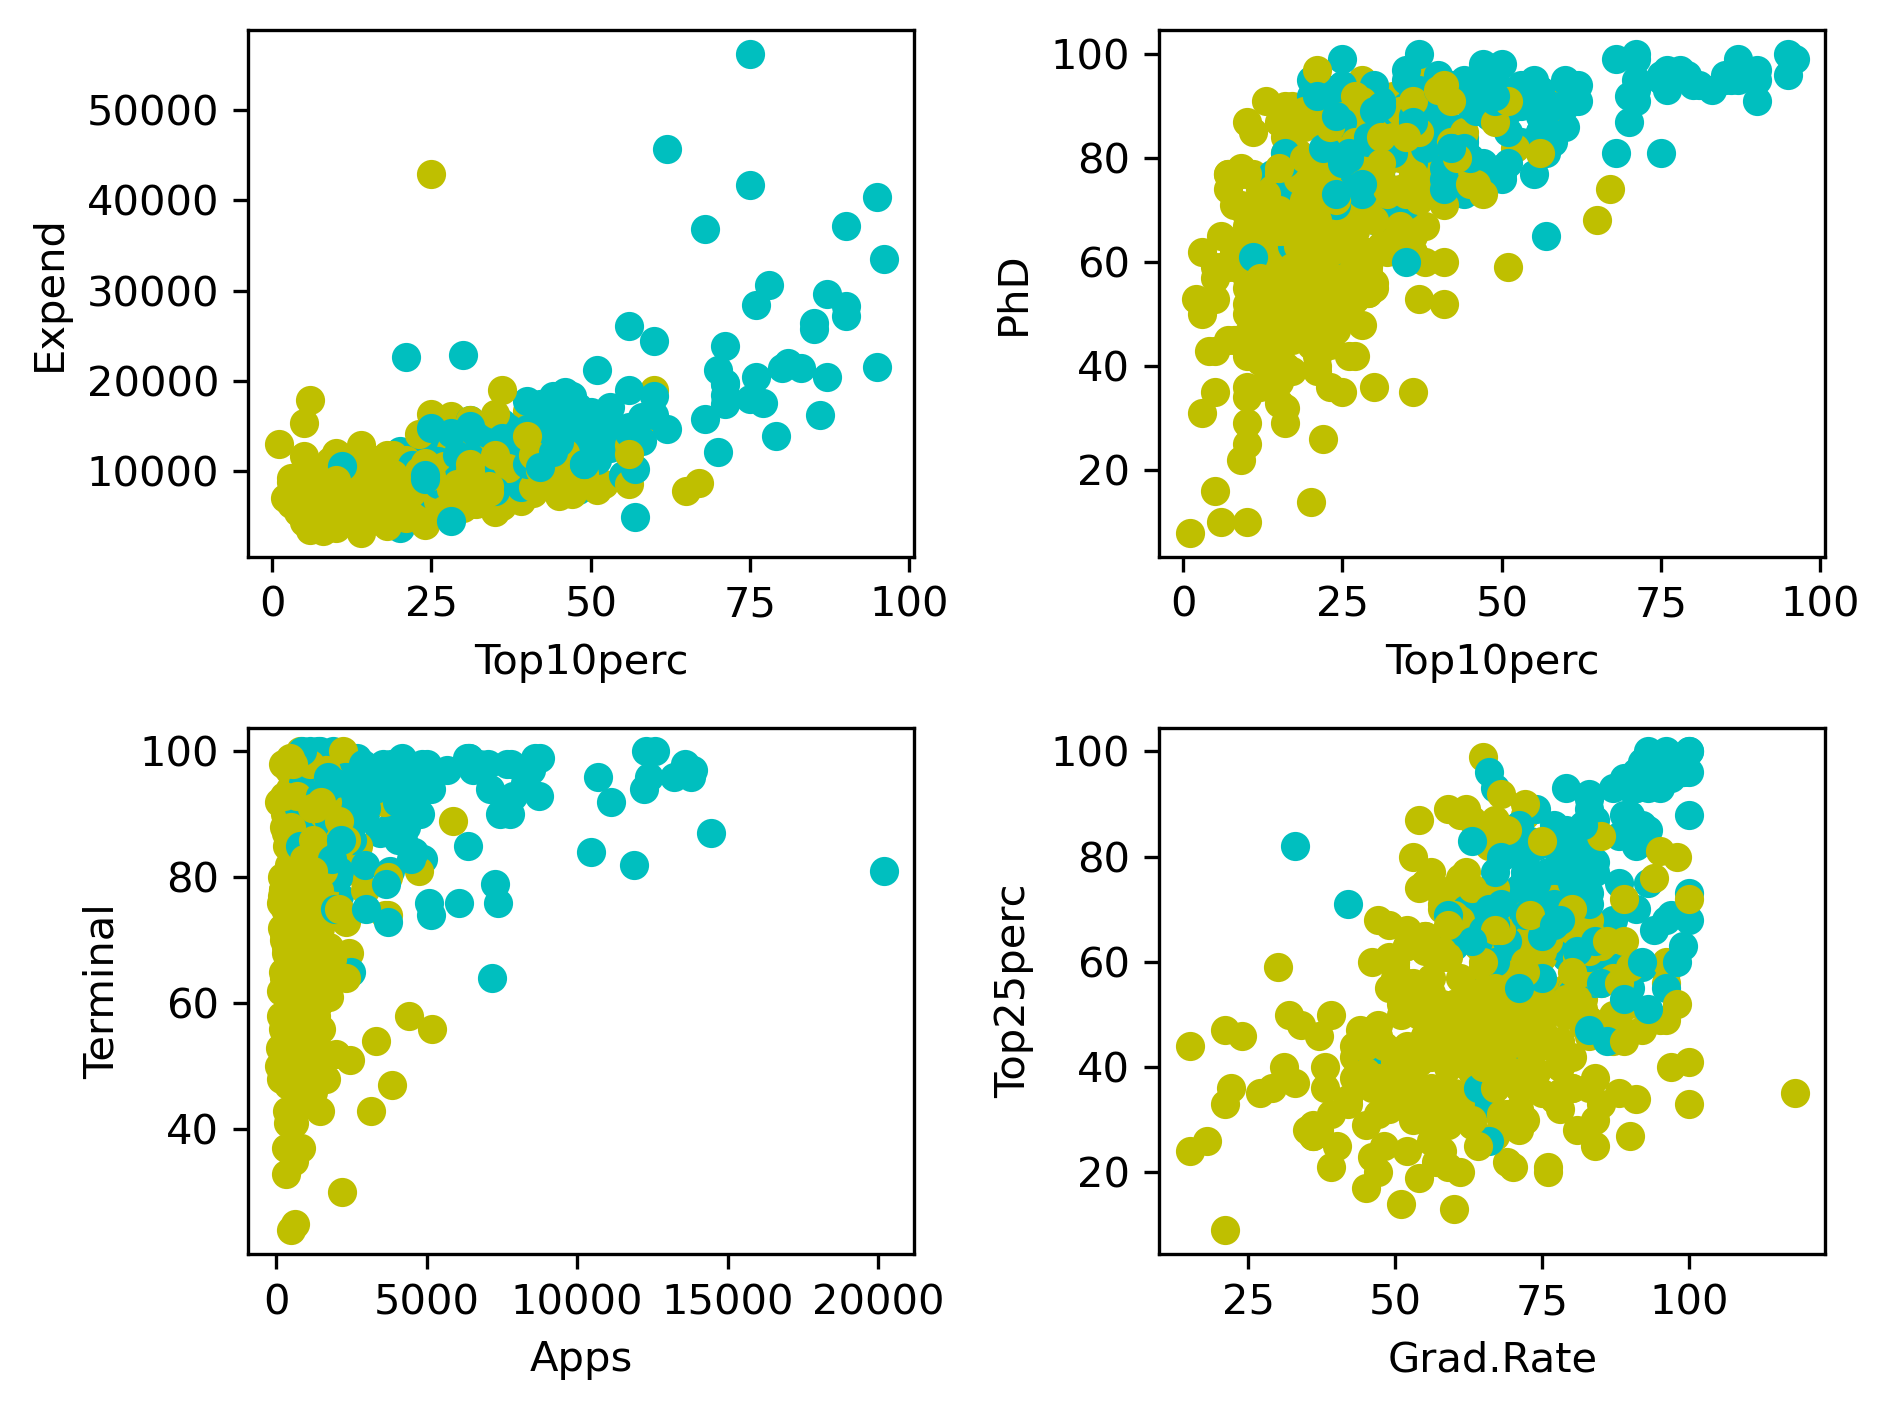

In [23]:
color_list=("y","c")
fig,ax=plt.subplots(2,2,dpi=300)
j=0
for i in data_private["Top25perc"].index:
    ax[0][0].scatter(data_private["Top10perc"][i],data_private["Expend"][i],color=color_list[model_agglomerative.labels_[j]])
    ax[0][1].scatter(data_private["Top10perc"][i],data_private["PhD"][i],color=color_list[model_agglomerative.labels_[j]])
    ax[1][0].scatter(data_private["Apps"][i],data_private["Terminal"][i],color=color_list[model_agglomerative.labels_[j]])
    ax[1][1].scatter(data_private["Grad.Rate"][i],data_private["Top25perc"][i],color=color_list[model_agglomerative.labels_[j]])
    j=j+1

ax[0][0].set_xlabel('Top10perc')
ax[0][0].set_ylabel('Expend')

ax[0][1].set_xlabel('Top10perc')
ax[0][1].set_ylabel('PhD')

ax[1][0].set_xlabel('Apps')
ax[1][0].set_ylabel('Terminal')

ax[1][1].set_xlabel('Grad.Rate')
ax[1][1].set_ylabel('Top25perc')

plt.tight_layout()